# Previsão de renda

## 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio




Esta análise tem como objetivo prever a renda com base em diversas variáveis. Utilizamos o método CRISP-DM (Cross-Industry Standard Process for Data Mining), um padrão de processo aberto e independente de fornecedor, que proporciona um modelo estruturado para guiar projetos de data mining. O CRISP-DM consiste em seis fases:

- Entendimento do Negócio: Compreender os objetivos do projeto e os requisitos a partir de uma perspectiva de negócios, convertendo esse conhecimento em uma definição do problema de mineração de dados.

- Entendimento dos Dados: Coletar dados iniciais, familiarizar-se com eles, identificar problemas de qualidade de dados e descobrir percepções preliminares.
- Preparação dos Dados: Preparar o conjunto de dados final que será utilizado na fase de modelagem. Isso inclui tarefas como seleção de dados, limpeza de dados, construção de variáveis e formatação de dados.
- Modelagem: Selecionar e aplicar técnicas de modelagem, calibrando os parâmetros para valores ótimos. Neste projeto, utilizamos modelos de regressão linear e árvore de regressão.
- Avaliação: Avaliar o modelo para garantir que ele atinge os objetivos de negócios. Se o modelo tiver um desempenho satisfatório, ele é considerado pronto para a fase de implementação.
- Implementação: Implementar o modelo na prática, que pode envolver a geração de relatórios ou a integração de um sistema de suporte à decisão.

## Etapa 2 Crisp-DM: Entendimento dos dados
Coletar dados iniciais, familiarizar-se com eles, identificar problemas de qualidade de dados e descobrir percepções preliminares.


### Dicionário de dados



| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
|data_ref                 | Data de referência de coleta das variáveis          | object
|id_cliente                    | Código de identificação do cliente                  | int64
|sexo                     | Sexo do cliente                                     | object
|posse_de_veiculo         | Indica se o cliente possui veículo                  | bool
|posse_de_imovel          | Indica se o cliente possui imóvel                   | bool
|qtd_filhos               | Quantidade de filhos do cliente                     | int64
|tipo_renda               | Tipo de renda do cliente                            | object
|educacao                 | Grau de instrução do cliente                        | object
|estado_civil             | Estado civil do cliente                             | object
|tipo_residencia          | Tipo de residência do cliente (própria, alugada etc)| object
|idade                    | Idade do cliente                                    | float64
|tempo_emprego            | Tempo no emprego atual                              | float64
|qt_pessoas_residencia    | Quantidade de pessoas que moram na residência       | float64
|renda                    | Renda em reais                                      | float64




### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from ydata_profiling import ProfileReport
import os

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score , mean_squared_error
import graphviz

import statsmodels.api as sm
import patsy



%matplotlib inline


### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

### Entendimento dos dados - Univariada
A análise de dados univariados é a primeira etapa na exploração de um conjunto de dados, onde você examina cada variável individualmente. Essa análise ajuda a entender a distribuição, a tendência central e a dispersão dos dados. Para isso usaremos o Pandas Profile.

In [3]:
renda.head(5)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [4]:
renda.drop(columns = 'Unnamed: 0' , inplace = True)

In [5]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   id_cliente             15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12427 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(6)
memory usa

In [6]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof.to_file('./output/renda_analisys.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Verificando informações nulas na coluna tempo_emprego

In [7]:
renda.tempo_emprego.isnull().sum()

2573

In [8]:
renda.loc[renda['tempo_emprego'].isnull()].head()

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
11,2015-01-01,6881,F,False,True,0,Pensionista,Secundário,Casado,Casa,65,NaN,2.0,1685.51
12,2015-01-01,2448,F,False,True,0,Pensionista,Secundário,Viúvo,Casa,60,NaN,1.0,6343.52
21,2015-01-01,698,F,True,True,0,Pensionista,Superior incompleto,Casado,Casa,58,NaN,2.0,1649.37
22,2015-01-01,11948,F,False,True,0,Pensionista,Secundário,Viúvo,Casa,61,NaN,1.0,4715.57
23,2015-01-01,11184,F,True,True,0,Pensionista,Secundário,Casado,Casa,59,NaN,2.0,799.18


In [9]:
renda.loc[renda['tempo_emprego'].isnull()].tail()

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
14979,2016-03-01,3578,F,True,True,1,Pensionista,Secundário,Casado,Casa,56,NaN,3.0,4672.65
14984,2016-03-01,5088,F,True,True,0,Pensionista,Secundário,Casado,Casa,55,NaN,2.0,1235.34
14986,2016-03-01,5831,F,False,False,0,Pensionista,Secundário,Casado,Casa,59,NaN,2.0,2410.18
14991,2016-03-01,1156,M,False,True,0,Pensionista,Secundário,Casado,Casa,62,NaN,2.0,5153.15
14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45


A coluna tempo_emprego possui 2573 linhas nulas. Assumiremos que os dados faltantes significam que a pessoa nunca trabalhou.

#### Verificando se possui linhas duplicadas

In [10]:
renda.duplicated().sum()

407

In [11]:
renda[renda['id_cliente'].duplicated()]

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
69,2015-01-01,557,F,True,True,1,Assalariado,Superior completo,Separado,Casa,26,5.778082,2.0,2990.66
241,2015-01-01,14210,F,True,True,0,Empresário,Secundário,Solteiro,Casa,51,0.873973,1.0,2029.38
263,2015-01-01,2550,F,True,True,1,Assalariado,Secundário,Casado,Casa,38,15.232877,3.0,8370.15
307,2015-01-01,14039,M,False,False,1,Assalariado,Secundário,Casado,Casa,36,3.624658,3.0,6648.79
318,2015-01-01,9084,F,False,True,0,Pensionista,Secundário,Separado,Casa,59,NaN,1.0,3028.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14990,2016-03-01,16399,M,True,True,1,Assalariado,Secundário,União,Casa,39,8.884932,3.0,7262.69
14991,2016-03-01,1156,M,False,True,0,Pensionista,Secundário,Casado,Casa,62,NaN,2.0,5153.15
14993,2016-03-01,10295,F,True,True,0,Empresário,Secundário,Casado,Casa,50,19.309589,2.0,4655.96
14994,2016-03-01,11477,M,True,False,0,Empresário,Superior incompleto,Casado,Casa,32,9.849315,2.0,1592.57


In [12]:
renda.id_cliente.duplicated().sum()

5155

In [13]:
renda[renda.id_cliente == 557]

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
48,2015-01-01,557,F,True,True,1,Assalariado,Superior completo,Separado,Casa,26,5.778082,2.0,2990.66
69,2015-01-01,557,F,True,True,1,Assalariado,Superior completo,Separado,Casa,26,5.778082,2.0,2990.66
9756,2015-10-01,557,F,True,True,1,Assalariado,Superior completo,Separado,Casa,26,5.778082,2.0,2990.66


Baseado no id_cliente, muitas linhas estão duplicadas, elinaremos as duplices e deixaremos apenas a primeira.

### Entendimento dos dados - Bivariadas




A análise de dados bivariados envolve a análise simultânea de duas variáveis para explorar a relação entre elas. Essa análise ajuda a identificar padrões, correlações, associações e possíveis causalidades entre as variáveis.

#### Análise das variáveis quantitativas

##### Matriz de correlação

A matriz de correlação verifica a correlação entre as váriaveis inteiras. Váriaveis com com valor 1.0 são consideradas correlações positivas fortes, e váriaveis com valor - 1.0 são consideradas correlação negativa forte.

In [14]:
renda_corr = (renda.drop(columns = 'id_cliente').select_dtypes(include = ['int64' , 'float64'])).corr()

In [15]:
renda_corr.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.360426,-0.063220,0.889777,0.029346
idade,-0.360426,1.000000,0.321573,-0.339320,0.022435
tempo_emprego,-0.063220,0.321573,1.000000,-0.065670,0.385013
qt_pessoas_residencia,0.889777,-0.339320,-0.065670,1.000000,0.047842
renda,0.029346,0.022435,0.385013,0.047842,1.000000


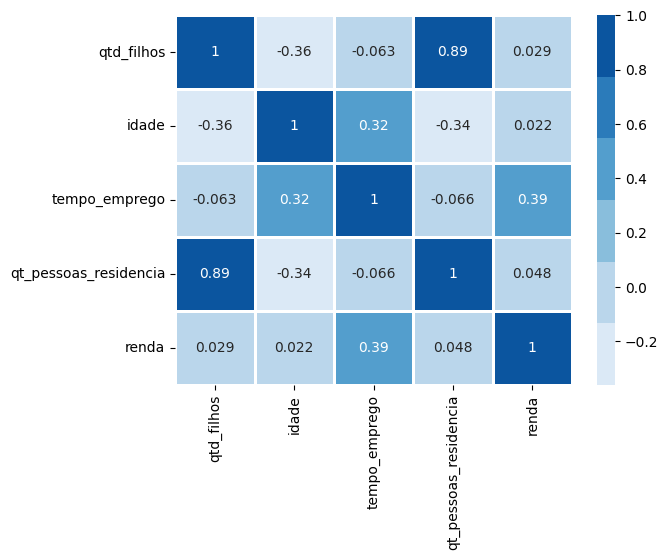

In [16]:
heatmap = sns.heatmap(renda_corr , annot = True , linewidths=1 , cmap = sns.color_palette('Blues'))
heatmap;

###### Visualizando correlações mais fortes

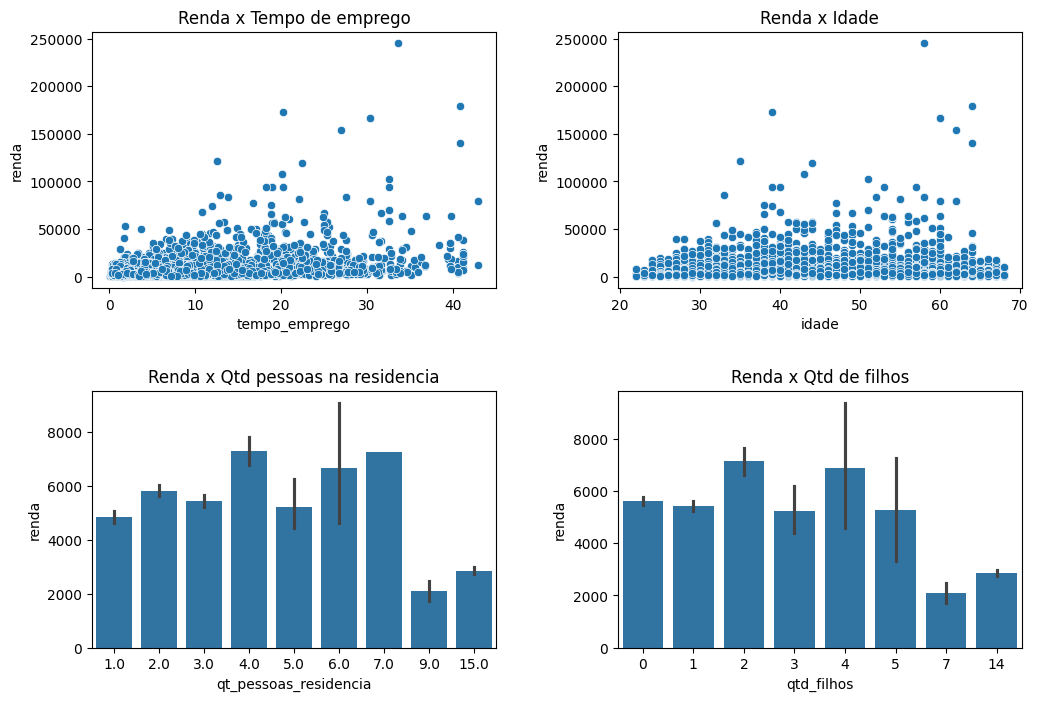

In [17]:
fig, ax = plt.subplots(2 ,2 , figsize = (12 , 8))

sns.scatterplot(x = 'tempo_emprego' , y = 'renda' , data = renda , ax = ax[0 , 0])
ax[0,0].set_title('Renda x Tempo de emprego');

sns.scatterplot(x = 'idade' , y = 'renda' , data = renda , ax = ax[0 , 1])
ax[0,1].set_title('Renda x Idade');

sns.barplot(x = 'qt_pessoas_residencia' , y = 'renda' , data = renda , ax = ax[1 , 0])
ax[1,0].set_title('Renda x Qtd pessoas na residencia');

sns.barplot(x = 'qtd_filhos' , y = 'renda' , data = renda , ax = ax[1 , 1])
ax[1,1].set_title('Renda x Qtd de filhos');

plt.subplots_adjust(hspace=0.4, wspace=0.3)

plt.show()

#### Análise das variáveis categóricas

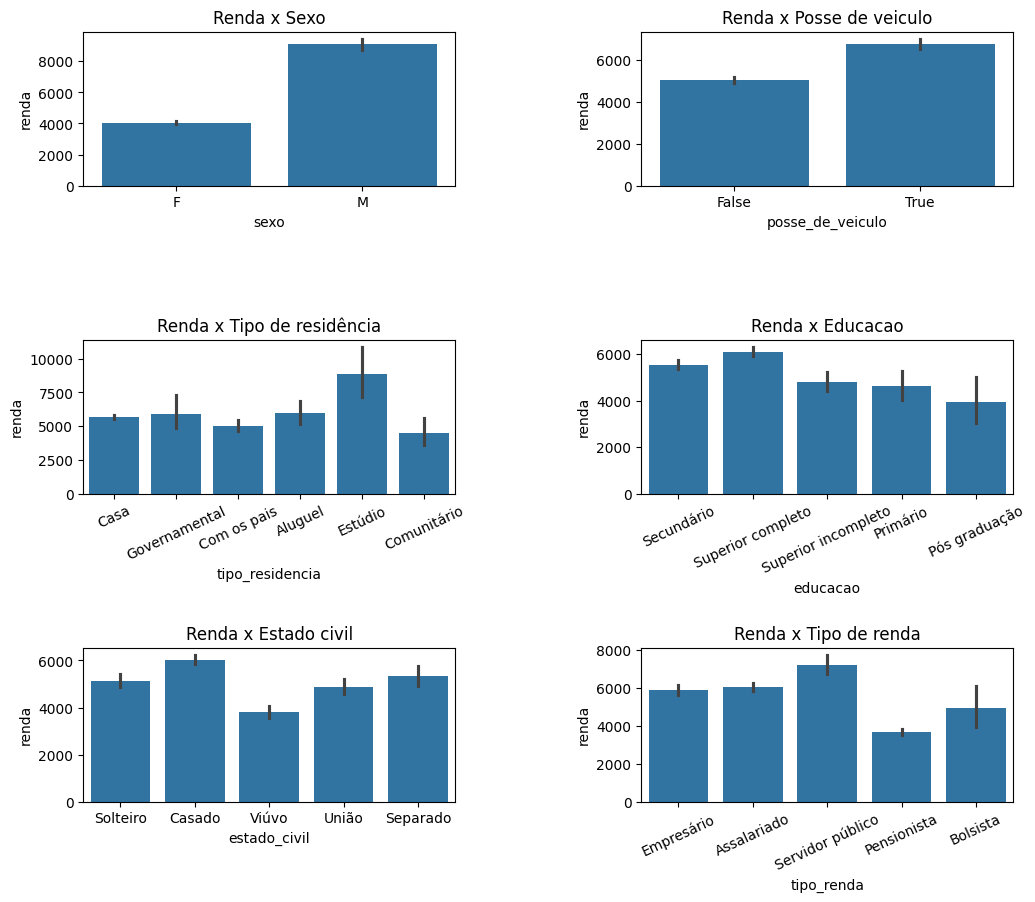

In [18]:
fig , ax = plt.subplots(3 , 2, figsize = (12 , 10))

sns.barplot(y='renda', x='sexo', data=renda , ax = ax[0 , 0])
ax[0,0].set_title('Renda x Sexo')

sns.barplot(y='renda', x='posse_de_veiculo', data=renda , ax = ax[0 , 1])
ax[0,1].set_title('Renda x Posse de veiculo')

sns.barplot(y='renda', x='tipo_residencia', data=renda , ax = ax[1 , 0])
ax[1,0].set_title('Renda x Tipo de residência')
ax[1,0].tick_params(axis='x', rotation=25)

sns.barplot(y='renda', x='educacao', data=renda , ax = ax[1 , 1])
ax[1,1].set_title('Renda x Educacao')
ax[1,1].tick_params(axis='x', rotation=25)

sns.barplot(y='renda', x='estado_civil', data=renda , ax = ax[2 , 0])
ax[2,0].set_title('Renda x Estado civil')

sns.barplot(y='renda', x='tipo_renda', data=renda , ax = ax[2 , 1])
ax[2,1].set_title('Renda x Tipo de renda')
ax[2,1].tick_params(axis='x', rotation=25)

plt.subplots_adjust(hspace=1.0, wspace=0.5)
plt.show()


## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [19]:
renda2 = (renda.assign(data_ref = lambda x : pd.to_datetime(x.data_ref))
 .pipe(lambda x : x.drop_duplicates(subset = 'id_cliente' , keep = 'first'))
 .assign(tempo_emprego = lambda x : x.tempo_emprego.fillna(0))
)

In [20]:
renda2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9845 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               9845 non-null   datetime64[ns]
 1   id_cliente             9845 non-null   int64         
 2   sexo                   9845 non-null   object        
 3   posse_de_veiculo       9845 non-null   bool          
 4   posse_de_imovel        9845 non-null   bool          
 5   qtd_filhos             9845 non-null   int64         
 6   tipo_renda             9845 non-null   object        
 7   educacao               9845 non-null   object        
 8   estado_civil           9845 non-null   object        
 9   tipo_residencia        9845 non-null   object        
 10  idade                  9845 non-null   int64         
 11  tempo_emprego          9845 non-null   float64       
 12  qt_pessoas_residencia  9845 non-null   float64       
 13  renda  

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Modelagem tipo árvore de regressão

In [21]:
renda_tree = (renda2.drop(columns = ['data_ref' , 'id_cliente'])
        .pipe(pd.get_dummies)
         )

X = renda_tree.drop(columns = ['renda'])
y = renda_tree.renda

In [22]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.33 , random_state = 21)
reg = tree.DecisionTreeRegressor(min_samples_leaf = 4 , max_depth = 5 , random_state = 21)

#### Rodando o modelo e avaliando


In [23]:
reg = reg.fit(X_train , y_train)

In [24]:
y_pred_train = reg.predict(X_train)
r2 = r2_score(y_train , y_pred_train)

residuos_train = y_train - y_pred_train
mse = np.mean(residuos_train**2)
rmse = np.sqrt(mse)

print('O R-Quadrado do modelo de treino é de {:.3f}'.format(r2))
print('O MSE do modelo de treino é de {:.3f}'.format(mse))
print('O RMSE do modelo de treino é de {:.3f}'.format(rmse))

O R-Quadrado do modelo de treino é de 0.481
O MSE do modelo de treino é de 38317069.214
O RMSE do modelo de treino é de 6190.078


In [25]:
reg = reg.fit(X_test , y_test)

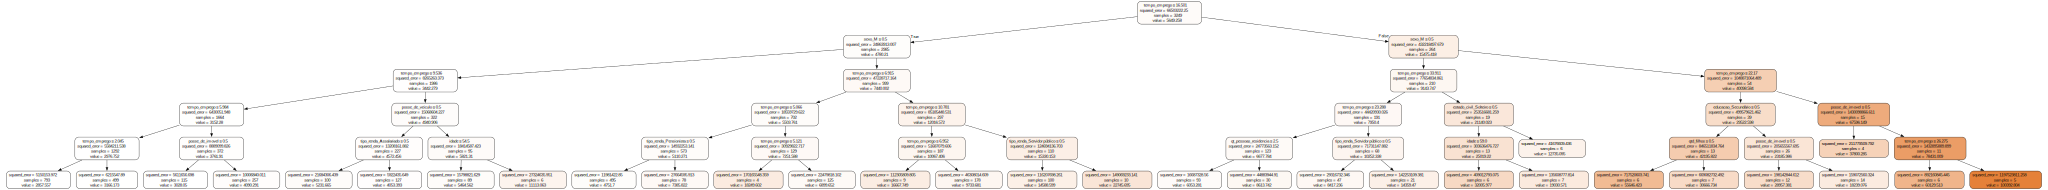

In [26]:
dot_data = tree.export_graphviz(reg, out_file=None, 
                                feature_names=X.columns,  
                                filled=True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data)
display(graph)

In [27]:
y_pred_test = reg.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

residuos_test = y_test - y_pred_test

mse = np.mean(residuos**2)
rmse = np.sqrt(mse)  

print('O R-Quadrado do módelo de teste é {:.2f}'.format(r2_test))
print('O MSE do módelo de teste é {:.2f}'.format(mse))
print('O RMSE do módelo de teste é {:.2f}'.format(rmse))

NameError: name 'residuos' is not defined

##### Gráficos de Resíduos

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = y_pred_train, y = residuos_train)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos Teste')
plt.show()

In [ ]:


plt.figure(figsize=(10, 6))
sns.scatterplot( x = y_pred_test, y = residuos_test)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos Teste')
plt.show()

O modelo de regressão linear do stats models parece explicar melhor a variável renda.

### Modelagem tipo regressão linear


In [ ]:
y , X = patsy.dmatrices('np.log(renda) ~ tipo_renda + posse_de_veiculo + educacao + estado_civil\
+ qt_pessoas_residencia + tempo_emprego + idade' , return_type = 'dataframe' , data = renda2)

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.33 , random_state = 21)


#### Rodando modelo e avaliando

In [ ]:
reg = sm.OLS(y_train.values.ravel(), X_train).fit()
reg.summary()

In [ ]:
y_pred_train = reg.predict(X_train)

r2 = r2_score(y_train , y_pred_train)

residuos_train = y_train.values.ravel() - y_pred_train

mse_train = np.mean(residuos_train**2)
rmse_train = np.sqrt(mse_train)

print('O R-Quadrado do modelo de treino é de {:.3f}'.format(r2))
print('O MSE do modelo de treino é de {:.3f}'.format(mse_train))
print('O RMSE do modelo de treino é de {:.3f}'.format(rmse_train))

In [ ]:
reg = sm.OLS(y_test.values.ravel(), X_test).fit()
reg.summary()

In [ ]:
y_pred_test = reg.predict(X_test)

r2 = r2_score(y_test , y_pred_test)

residuos_test = (y_test.values.ravel()) - y_pred_test

mse_test = np.mean(residuos_test**2)
rmse_test = np.sqrt(mse_test)

print('O R-Quadrado do modelo de teste  é de {:.3f}'.format(r2))
print('O MSE do modelo de teste é de {:.3f}'.format(mse_test))
print('O RMSE do modelo de teste é de {:.3f}'.format(rmse_test))

##### Gráfico de Resíduos

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot( x = y_pred_train, y = residuos_train)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos treino')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot( x = y_pred_test, y = residuos_test)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos teste')
plt.show()

## Etapa 5 Crisp-DM: Avaliação dos resultados
A análise dos modelos de regressão linear e árvore de regressão revela que ambos não conseguem explicar de maneira precisa a variável renda. Embora se observe uma relação mais significativa com as variáveis tempo_emprego e idade, os indicadores R², MSE e RMSE não fornecem uma conclusão clara sobre o comportamento da renda.

É importante destacar que a regressão linear apresenta uma vantagem nesse contexto. Ela permite uma interpretação direta dos coeficientes, facilitando a compreensão de como cada variável independente afeta a variável dependente, neste caso, a renda. Embora o R² da regressão linear seja menor, o MSE e RMSE são consideravelmente menores em comparação com a árvore de regressão. Isso sugere que, apesar de explicar menos da variabilidade total da renda, o modelo de regressão linear tem uma precisão melhor na previsão.

Assim, a regressão linear se destaca como uma opção mais confiável para modelar a relação entre as variáveis estudadas e a renda, oferecendo uma análise mais clara e interpretação dos resultados.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [ ]:
# Carregando pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from ydata_profiling import ProfileReport
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error

import statsmodels.api as sm
import patsy

# Carregando dados
renda = pd.read_csv('./input/previsao_de_renda.csv')
renda2 = (renda.assign(data_ref = lambda x : pd.to_datetime(x.data_ref))
 .pipe(lambda x : x.drop_duplicates(subset = 'id_cliente' , keep = 'first'))
 .assign(tempo_emprego = lambda x : x.tempo_emprego.fillna(0))
)

# Regressão linear
y , X = patsy.dmatrices('np.log(renda) ~ tipo_renda + posse_de_veiculo + educacao + estado_civil\
+ qt_pessoas_residencia + tempo_emprego + idade' , return_type = 'dataframe' , data = renda2)

X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.33 , random_state = 21)

reg = sm.OLS(y_test.values.ravel(), X_test).fit()

# Avaliando modelo
y_pred_test = reg.predict(X_test)

r2 = r2_score(y_test , y_pred_test)

res = (y_test.values.ravel()) - y_pred_test
mse_test = np.mean(res**2)
rmse_test = np.sqrt(mse_test)

print('O R-Quadrado do modelo de teste  é de {:.3f}'.format(r2))
print('O MSE do modelo de teste é de {:.3f}'.format(mse_test))
print('O RMSE do modelo de teste é de {:.3f}'.format(rmse_test))


# Convertendo o resumo para string
reg_sum = reg.summary()
sum_text = reg_sum.as_text()

# Salvando regressão
plt.figure(figsize=(10, 6))
plt.text(0.01, 0.05, sum_text, {'fontsize': 10}, fontproperties='monospace')
plt.axis('off')
plt.savefig('./output/regressao.png', bbox_inches='tight')

#Salvando gráfico de residuos
plt.figure(figsize=(10, 6))
sns.scatterplot( x = y_pred_test, y = res)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos teste')
plt.savefig('./output/grafico de residuos.png', bbox_inches='tight')